In [ ]:
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import BatchNormalization
import keras
from keras.preprocessing import image
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm
import os
from PIL import Image

Using TensorFlow backend.


In [2]:
os.listdir("data/train/")

['airbus A380',
 'boeing 707',
 'boeing 737',
 'challenger 600',
 'Falcon 900',
 'hawk T1']

In [3]:
# DIR_PATH = "data/train/"
# X,Y = [], []
# count = 0
# for path in os.listdir(DIR_PATH):
#     print (f"Extracting from : {path}")
#     for image in os.listdir(os.path.join(DIR_PATH, path)):
#         X.append(plt.imread(os.path.join(DIR_PATH, path, image), 0))
#         Y.append(count)
#     count += 1

In [4]:
# X = np.array(X)
# Y = np.array(Y)

In [5]:
# X.shape

In [6]:
DIR_PATH = "data/train/"
X,Y = [], []
count = 0
for path in os.listdir(DIR_PATH):
    print (f"Extracting from : {path}")
    for image in os.listdir(os.path.join(DIR_PATH, path)):
        img = Image.open(os.path.join(DIR_PATH, path, image))
        img = img.convert('L')
        img = img.resize((146, 220))
        X.append(np.array(img))
        Y.append(count)
    count += 1

Extracting from : airbus A380
Extracting from : boeing 707
Extracting from : boeing 737
Extracting from : challenger 600
Extracting from : Falcon 900
Extracting from : hawk T1


In [7]:
X = np.array(X).astype('float')
Y = np.array(Y).astype('float')

In [14]:
# Y = to_categorical(Y, num_classes=6)

In [15]:
Y = Y.astype('float')

In [16]:
X.shape

(480, 220, 146)

In [12]:
X.dtype

dtype('float64')

In [32]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # All images will be rescaled by 1./255
# train_datagen = ImageDataGenerator(rescale=1./255)

# # Flow training images in batches of 128 using train_datagen generator
# train_generator = train_datagen.flow_from_directory(
#         '/home/bipinpanwar55/anaconda3/aircraft_classification/data/train/',  # This is the source directory for training images
#         target_size=(500, 500),  # All images will be resized to 150x150
#         batch_size=64,
#         # Since we use categorical_crossentropy loss, we need categorical labels
#         class_mode='categorical')

Found 481 images belonging to 6 classes.


In [ ]:
model = Sequential()

model.add(Conv2D(32, (7, 7),input_shape=(220, 146, 1), padding = "same"))
model.add(MaxPooling2D((4,4), strides = (2,2)))
model.add(Conv2D(64, (3, 3), padding = "same"))
model.add(MaxPooling2D(strides = (1,1)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(1000, activation = keras.activations.relu))
model.add(Dense(6, activation = "softmax"))

In [ ]:
model.compile(loss = "categorical_crossentropy", metrics=['accuracy'], optimizer = 'adam')

In [15]:
model.fit(x = X, y = Y, batch_size = 64, validation_split=0.2)

Train on 384 samples, validate on 96 samples
 64/384 [====>.........................] - ETA: 0s

TypeError: 'NoneType' object is not callable

In [14]:
X.shape

(480, 220, 146, 1)

In [50]:
X.dtype

dtype('float64')

In [51]:
Y.dtype

dtype('float64')

In [20]:
Y.shape

(480, 6)

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            multiple                  32736     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 multiple                  0         
_________________________________________________________________
conv1d_3 (Conv1D)            multiple                  6208      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 multiple                  0         
_________________________________________________________________
batch_normalization (BatchNo multiple                  256       
_________________________________________________________________
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                 

In [7]:
data = keras.datasets.mnist.load_data()

In [8]:
data[0][0].shape

(60000, 28, 28)

In [34]:
data[0][1]

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

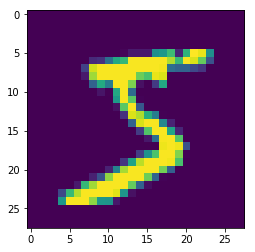

In [9]:
plt.imshow(data[0][0][0])